### Webscrapping Python 

In [ ]:
import random
from time import sleep
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
# Aquí se debe de cambiar la ruta
DRIVER_PATH = 'documentos/chromedriver 3'
opt = webdriver.ChromeOptions()
opt.add_argument('--start-maximized')
opt.add_argument('--disable-extensions')
# Aquí se debe checar que se tenga la versión más actualizada de Chrome
s = Service(r'documentos/chromedriver 3')
driver = webdriver.Chrome(service=s,options=opt)


In [ ]:
driver.get('https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true')
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")


In [ ]:
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text


### Impresion Auto más caro

In [ ]:
driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=desc-price")
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
# mail = driver.find_element(By.XPATH, mail_input2)
# driver.implicitly_wait(3)
Diccionario = {}
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text
    Diccionario.update({nombre : precio }) 

In [ ]:
print(list(Diccionario.keys())[0])

2020, Honda Odyssey


#### Agregar por marcas

In [ ]:
driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=asc-price")
# Se debe cambiar ASC por DESC y se cambia el ASCendente o DESCendente dependiendo del precio

sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
#mail = driver.find_element(By.XPATH, mail_input2)
#driver.implicitly_wait(3)
Diccionario = {}
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text
    Diccionario.update({nombre : precio })

In [ ]:
Diccionario


{'2017, Chevrolet Spark': '$ 169,000\nMensualidad $ 3,288',
 '2016, Chevrolet Spark': '$ 150,000\nMensualidad $ 2,918',
 '2016, Chevrolet Aveo': '$ 156,905\nMensualidad $ 3,052',
 '2016, Ford Figo': '$ 168,900\nMensualidad $ 3,286',
 '2017, Chevrolet Aveo': '$ 169,000\nMensualidad $ 3,288',
 '2019, Dodge Attitude': '$ 171,231\nMensualidad $ 3,331',
 '2019, Chevrolet Beat': '$ 173,120\nMensualidad $ 3,368',
 '2017, Volkswagen Gol': '$ 199,000\nMensualidad $ 3,871',
 '2016, Nissan March': '$ 175,800\nMensualidad $ 3,420',
 '2018, Volkswagen Gol': '$ 193,200\nMensualidad $ 3,759',
 '2018, Ford Figo': '$ 178,000\nMensualidad $ 3,463',
 '2018, Nissan Versa': '$ 179,800\nMensualidad $ 3,498',
 '2018, Chevrolet Aveo': '$ 180,000\nMensualidad $ 3,502',
 '2020, Renault Kwid': '$ 187,000\nMensualidad $ 3,638',
 '2018, Chevrolet Beat': '$ 187,500\nMensualidad $ 3,648',
 '2020, Chevrolet Beat': '$ 199,350\nMensualidad $ 3,878',
 '2018, Volkswagen Vento': '$ 189,000\nMensualidad $ 3,677',
 '2015, V

In [ ]:
print(list(Diccionario.keys())[0])

2017, Chevrolet Spark


In [ ]:

driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=desc-price")
sleep(random.uniform(8.0,10.0))
autos  = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")
# mail = driver.find_element(By.XPATH, mail_input2)
# driver.implicitly_wait(3)


In [ ]:

ListaApariciones = []
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text

  
    ListaApariciones.append(nombre.split(" ")[1])
    # Se selecciona la marca del vehiculo que quieres
    Diccionario.update({nombre.split(" ")[1] : precio })

In [ ]:
SumadeMarcas = dict(zip(ListaApariciones,map(lambda x: ListaApariciones.count(x),ListaApariciones)))

In [ ]:
print(SumadeMarcas)

{'Honda': 5, 'Toyota': 3, 'Jeep': 6, 'Chevrolet': 1, 'Audi': 9, 'Mini': 3, 'Mercedes': 5, 'BMW': 4, 'Volkswagen': 1, 'Seat': 1, 'Buick': 1, 'Ford': 1}


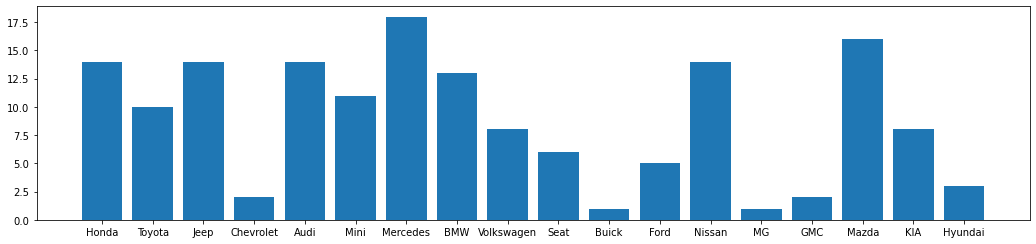

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.bar(range(len(SumadeMarcas)), list(SumadeMarcas.values()), align='center')
plt.xticks(range(len(SumadeMarcas)), list(SumadeMarcas.keys()))
plt.show()

Agregar a archivo txt

In [ ]:
import json
Nombre = {'CarrosBaratos': SumadeMarcas}
with  open("./documentos/carros.txt", "w") as file:
    file.write(json.dumps(Nombre)) # Usa "json.loads" para hacer lo contrario 

Recorrer 3 espacios hacia abajo y recolectar la informacion 

In [ ]:
# Aquí va la URL de la lista de los carros mas caros ordenados DESCendentemente
driver.get("https://www.olxautos.com.mx/autos_c84?filter=olxautos_listing_eq_true&sorting=desc-price")
sleep(random.uniform(8.0,10.0))

# Se itera 3 desde que presionas el boton de cargar
for x in range(3):
    sleep(random.uniform(2.0,4.0))
    click = driver.find_element(By.XPATH, "//button[@data-aut-id='btnLoadMore']").click()


In [ ]:
# Aqui se recolecta el valor de los autos, cabe destacar que antes de las iteraciones solo imprime 40
autos = driver.find_elements(By.XPATH, "//li[@data-aut-id='itemBox']")

In [ ]:
# Longitud de los archivos 
len(autos)

160

In [ ]:
ListaApariciones = []
for auto in autos:
    precio = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemPrice']").text 
    nombre = auto.find_element(By.XPATH, ".//div[@data-aut-id='itemTitle']").text

    
    ListaApariciones.append(nombre.split(" ")[1])
   # Se selecciona la marca del vehiculo que quieres
    Diccionario.update({nombre.split(" ")[1] : precio })

In [ ]:
Diccionario

{'2017, Chevrolet Spark': '$ 169,000\nMensualidad $ 3,288',
 '2016, Chevrolet Spark': '$ 150,000\nMensualidad $ 2,918',
 '2016, Chevrolet Aveo': '$ 156,905\nMensualidad $ 3,052',
 '2016, Ford Figo': '$ 168,900\nMensualidad $ 3,286',
 '2017, Chevrolet Aveo': '$ 169,000\nMensualidad $ 3,288',
 '2019, Dodge Attitude': '$ 171,231\nMensualidad $ 3,331',
 '2019, Chevrolet Beat': '$ 173,120\nMensualidad $ 3,368',
 '2017, Volkswagen Gol': '$ 199,000\nMensualidad $ 3,871',
 '2016, Nissan March': '$ 175,800\nMensualidad $ 3,420',
 '2018, Volkswagen Gol': '$ 193,200\nMensualidad $ 3,759',
 '2018, Ford Figo': '$ 178,000\nMensualidad $ 3,463',
 '2018, Nissan Versa': '$ 179,800\nMensualidad $ 3,498',
 '2018, Chevrolet Aveo': '$ 180,000\nMensualidad $ 3,502',
 '2020, Renault Kwid': '$ 187,000\nMensualidad $ 3,638',
 '2018, Chevrolet Beat': '$ 187,500\nMensualidad $ 3,648',
 '2020, Chevrolet Beat': '$ 199,350\nMensualidad $ 3,878',
 '2018, Volkswagen Vento': '$ 189,000\nMensualidad $ 3,677',
 '2015, V

In [ ]:
# Se suma las marcas de los autos desde unos grupos
#LAMBDA es una función anonima
# Función Lambda para calcular el cuadrado de un número
#square = lambda x: x ** 2
#print(square(3)) # Resultado: 9

SumadeMarcas = dict(zip(ListaApariciones,map(lambda x: ListaApariciones.count(x),ListaApariciones)))

In [ ]:
print(SumadeMarcas)

{'Honda': 14, 'Toyota': 10, 'Jeep': 14, 'Chevrolet': 2, 'Audi': 14, 'Mini': 11, 'Mercedes': 18, 'BMW': 13, 'Volkswagen': 8, 'Seat': 6, 'Buick': 1, 'Ford': 5, 'Nissan': 14, 'MG': 1, 'GMC': 2, 'Mazda': 16, 'KIA': 8, 'Hyundai': 3}


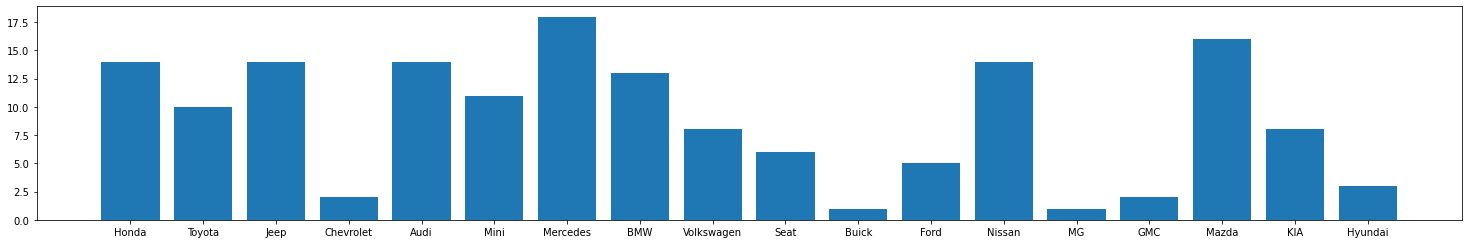

In [ ]:
# Grafica del diccionario
import matplotlib.pyplot as plt
# Ajuste del tamaño de las graficas
plt.rcParams["figure.figsize"] = [20.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.bar(range(len(SumadeMarcas)), list(SumadeMarcas.values()), align='center')
plt.xticks(range(len(SumadeMarcas)), list(SumadeMarcas.keys()))
plt.show()

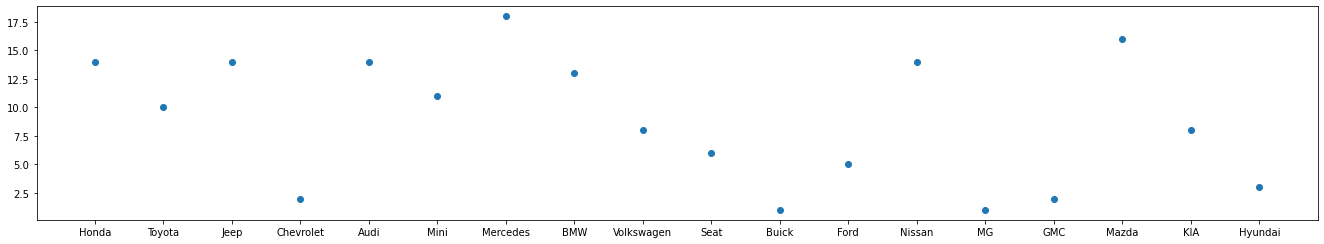

In [ ]:
#Grafica del diccionario
import matplotlib.pyplot as plt
# Ajuste del tamaño de las graficas
plt.rcParams["figure.figsize"] = [18.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.scatter(range(len(SumadeMarcas)), list(SumadeMarcas.values()))
plt.xticks(range(len(SumadeMarcas)), list(SumadeMarcas.keys()))
plt.show()

In [ ]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)